# Day 6 - Parametric VaR (Variance-Covariance Method)

## Learning Objectives
- Understand the concept of Value at Risk (VaR) using the Parametric method.
- Apply the variance-covariance method to estimate portfolio risk assuming normality.
- Calculate and visualize VaR for a single asset (AAPL).

## Key Concepts
- Parametric VaR assumes returns are normally distributed.
- VaR = z * σ * portfolio_value, where z is the z-score for confidence level.
- We typically calculate 1-day VaR at 95% or 99% confidence level.

In [3]:
# Step 1: Load Data from yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download AAPL adjusted close data for the past 5 years
ticker = "AAPL"
df = yf.download(ticker, start="2018-01-01", progress=False)

# Use Adjusted Close and calculate returns
df['Return'] = df['Close'].pct_change()
df.dropna(inplace=True)

# Display last few rows
df.tail()


C:\Users\vedik\AppData\Local\Temp\ipykernel_17732\1561389042.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", progress=False)


Price,Close,High,Low,Open,Volume,Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2025-07-24,213.759995,215.690002,213.529999,213.899994,46022600,-0.001821
2025-07-25,213.880005,215.240005,213.399994,214.699997,40268800,0.000561
2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000,0.000795
2025-07-29,211.270004,214.809998,210.820007,214.179993,51411700,-0.012988
2025-07-30,208.570007,212.389999,207.720001,211.895004,27707141,-0.012780


In [4]:
# Step 2: Parametric VaR Calculation (Variance-Covariance Method)
import numpy as np

confidence_level = 0.95
z_score = abs(np.percentile(np.random.normal(0, 1, 100000), (1 - confidence_level) * 100))
portfolio_value = 1_000_000  # Assume $1,000,000 portfolio

mu = df['Return'].mean()
sigma = df['Return'].std()

var_1day = z_score * sigma * portfolio_value
print(f"Parametric 1-Day VaR at {int(confidence_level*100)}% confidence: ${var_1day:,.2f}")

Parametric 1-Day VaR at 95% confidence: $32,438.93


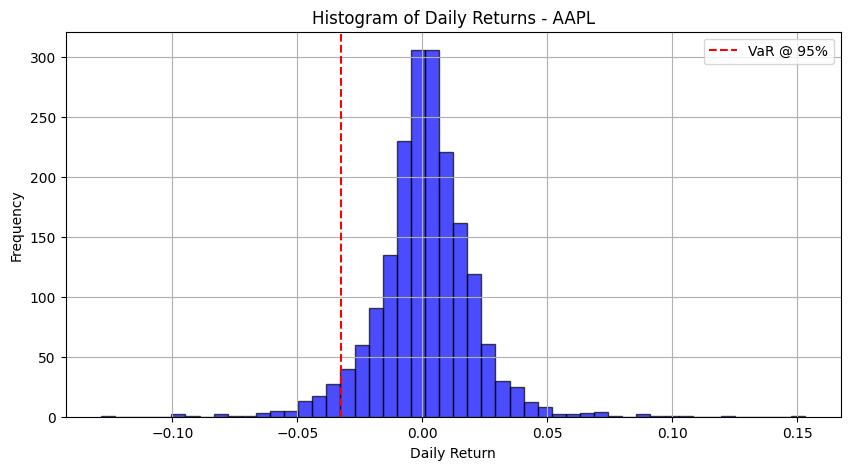

In [5]:
# Step 3: Visualize distribution of returns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['Return'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(-var_1day/portfolio_value, color='red', linestyle='dashed', label=f'VaR @ {int(confidence_level*100)}%')
plt.title('Histogram of Daily Returns - AAPL')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()